# Steady one-dimensional flow with constant transmissivity

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 3) # set default figure size

## Flow between two rivers

<img src="figs/fig1.1.pdf" width=400>

In [2]:
# parameters
L = 1000 # aquifer length, m
H = 10 # aquifer thickness, m
zb = -6 # aquifer bottom, m
k = 10 # hydraulic conductivity, m/d
n = 0.3 # porosity, -
T = k * H # transmissivity, m^2/d
h0 = 6 # specified head at the left boundary, m
hL = 4 # specified head at the right boundary, m

In [3]:
# solution
x = np.linspace(0, L, 100)
h = (hL - h0) * x / L + h0
Qx = - T * (hL - h0) / L * np.ones_like(x)

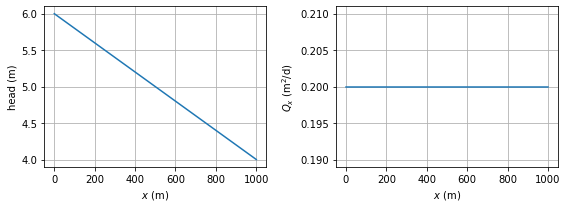

In [4]:
# basic plot
plt.subplot(121)
plt.plot(x, h)
plt.grid()
plt.xlabel('$x$ (m)')
plt.ylabel('head (m)')
plt.subplot(122)
plt.plot(x, Qx)
plt.grid()
plt.xlabel('$x$ (m)')
plt.ylabel('$Q_x$ (m$^2$/d)')
plt.tight_layout()

In [5]:
# solution
xg, zg = np.meshgrid(np.linspace(0, L, 2), np.linspace(zb, zb + H, 2))
qx = -k * (hL - h0) / L * np.ones_like(xg)
qz = np.zeros_like(xg)

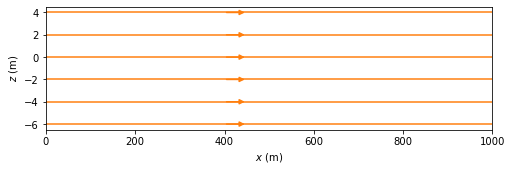

In [6]:
# basic stream plot
plt.subplot(111, aspect=25)
plt.streamplot(xg, zg, qx, qz, color='C1', density=0.2)
plt.xlabel('$x$ (m)')
plt.ylabel('$z$ (m)');

In [7]:
# travel time
vx = -k * (hL - h0) / (n * L)
print(f'mean velocity: {vx:.4f} m/d')
print(f'travel time from left river to right river: {L / vx:.0f} days')

mean velocity: 0.0667 m/d
travel time from left river to right river: 15000 days


## Areal recharge between two rivers

<img src="figs/fig1.2.pdf" width=400>

In [8]:
# parameters
L = 1000 # aquifer length, m
H = 10 # saturated thickness, m
zb = -5 # aquifer bottom, m
k = 10 # hydraulic conductivity, m/d
n = 0.3 # porosity, -
T = k * H # transmissivity, m^2/d
h0 = 6 # specified head at the left boundary, m
hL = 4 # specified head at the right boundary, m
N = 0.001  # areal recharge, m/d

In [9]:
# solution
x = np.linspace(0, L, 100)
h = -N / (2 * T) * (x ** 2 - L * x) + (hL - h0) * x / L + h0
Qx = N * (x - L / 2) - T * (hL - h0) / L 

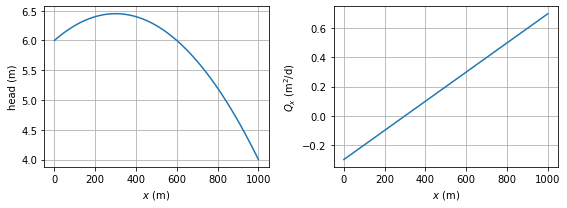

In [10]:
# basic plot
plt.subplot(121)
plt.plot(x, h)
plt.grid()
plt.xlabel('$x$ (m)')
plt.ylabel('head (m)')
plt.subplot(122)
plt.plot(x, Qx)
plt.grid()
plt.xlabel('$x$ (m)')
plt.ylabel('$Q_x$ (m$^2$/d)')
plt.tight_layout()

In [11]:
print(f'discharge into left river: {-Qx[0]:.3f} m^2/d')
print(f'discharge into right river: {Qx[-1]:.3f} m^2/d')

discharge into left river: 0.300 m^2/d
discharge into right river: 0.700 m^2/d


In [12]:
# solution
xg, zg = np.meshgrid(np.linspace(0, L, 10), np.linspace(zb, zb + H, 5))
qx = (N * (xg - L / 2) - T * (hL - h0) / L) / H
qz = - N * (zg - zb) / H

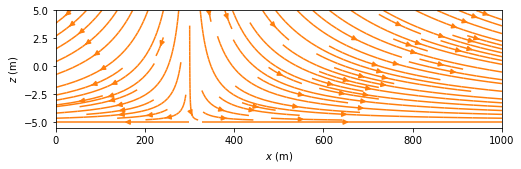

In [13]:
# basic stream plot
plt.subplot(111, aspect=25)
plt.streamplot(xg, zg, qx, qz, color='C1')
plt.xlabel('$x$ (m)')
plt.ylabel('$z$ (m)');

In [14]:
# solution
x = np.linspace(0, L, 100)
Qx = N * (x - L / 2) - T * (hL - h0) / L 
psi = np.zeros((2, len(x)))
psi[1, :] = -Qx # at the top of the aquifer, the stream function is -Qx
xg = x
zg = [zb, zb + H]

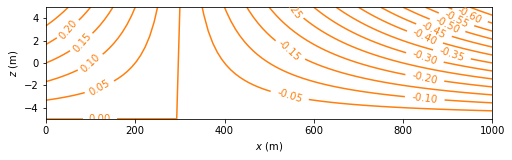

In [15]:
# basic streamline plot
plt.subplot(111, aspect=25)
cs = plt.contour(xg, zg, psi, 20, colors='C1', linestyles='-')
plt.clabel(cs, fmt='%1.2f')
plt.xlabel('$x$ (m)')
plt.ylabel('$z$ (m)');

Figure 1.8 Streamlines in a vertical cross-section for areal recharge between two rivers.

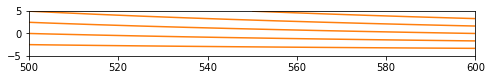

In [16]:
# basic streamline plot of part of flow field without vertical exaggeration
plt.subplot(111, aspect=1, xlim=(500, 600))
cs = plt.contour(xg, zg, psi, 20, colors='C1', linestyles='-');

## Areal recharge between an impermeable boundary and a river

<img src="figs/fig1.3.pdf" width=400>

In [17]:
# parameters
L = 1000 # aquifer length, m
H = 10 # aquifer thickness, m
zb = -5 # aquifer bottom, m
k = 10 # hydraulic conductivity, m/d
T = k * H # transmissivity, m^2/d
hL = 4 # specified head at the right boundary, m
N = 0.001  # areal recharge, m/d

In [18]:
# solution
x = np.linspace(0, L, 100)
h = -N / (2 * T) * (x ** 2 - L ** 2) + hL
Qx = N * x

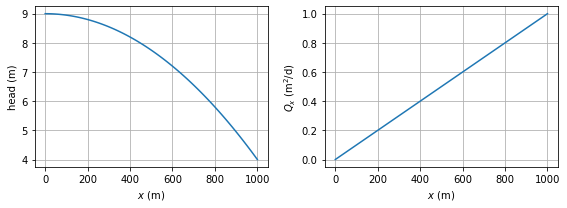

In [19]:
# basic plot
plt.subplot(121)
plt.plot(x, h)
plt.grid()
plt.xlabel('$x$ (m)')
plt.ylabel('head (m)')
plt.subplot(122)
plt.plot(x, Qx)
plt.grid()
plt.xlabel('$x$ (m)')
plt.ylabel('$Q_x$ (m$^2$/d)')
plt.tight_layout()

<img src="figs/fig1.4.pdf" width=400>

In [20]:
# additional parameters
hR = 4 # water level in river, m
c = 10 # hydraulic resistance of river bed, d

In [21]:
# solution
x = np.linspace(0, L, 100)
C = H / c
hL = N * L / C + hR
h = -N / (2 * T) * (x ** 2 - L ** 2) + hL
Qx = N * x

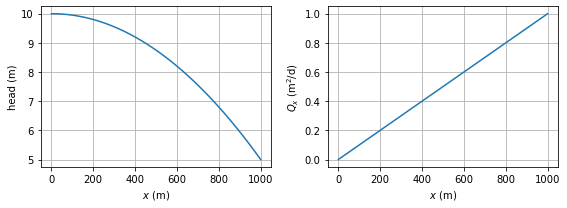

In [22]:
# basic plot
plt.subplot(121)
plt.plot(x, h)
plt.grid()
plt.xlabel('$x$ (m)')
plt.ylabel('head (m)')
plt.subplot(122)
plt.plot(x, Qx)
plt.grid()
plt.xlabel('$x$ (m)')
plt.ylabel('$Q_x$ (m$^2$/d)')
plt.tight_layout()

## Flow through two zones of different transmissivities

<img src="figs/fig1.5.pdf" width=400>

In [23]:
# parameters
h0 = 6 # specified head at the left boundary, m
hL = 4 # specified head at the right boundary, m
L0 = 500 # length of zone 0, m
L1 = 500 # length of zone 1, m
T0 = 200 # transmissivity of zone 0, m^2/d
T1 = 20 # transmissivity of zone 1, m^2/d
L = L0 + L1 # total length, m

In [24]:
# solution
x = np.linspace(0, L, 101)
h = np.empty_like(x)
h[x < L0] = T1 * L / (T0 * L1 + T1 * L0) * (hL - h0) * x[x < L0] / L + h0
h[x >= L0] = T0 * L / (T0 * L1 + T1 * L0) * (hL - h0) * (x[x >= L0] - L) / L + hL
Qx = -T0 * T1 * L / (T0 * L1 + T1 * L0) * (hL - h0) / L 
hhalfway = h[50]
print(f'head halfway: {hhalfway:.2f} m')
print(f'head gradient zone 0: {(hhalfway - h0) / L0: .6f}')
print(f'head gradient zone 1: {(hL - hhalfway) / L1: .6f}')

head halfway: 5.82 m
head gradient zone 0: -0.000364
head gradient zone 1: -0.003636


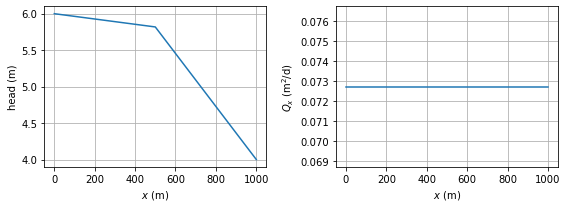

In [25]:
# basic plot
plt.subplot(121)
plt.plot(x, h)
plt.grid()
plt.xlabel('$x$ (m)')
plt.ylabel('head (m)')
plt.subplot(122)
plt.plot([0, L], [Qx, Qx])
plt.grid()
plt.xlabel('$x$ (m)')
plt.ylabel('$Q_x$ (m$^2$/d)')
plt.tight_layout()

In [26]:
print(f'arithmetic mean transmissivity: {(T0 + T1) / 2: .1f} m^2/d')
print(f'effective transmissivity: {L / (L1 / T1 + L0 / T0): .1f} m^2/d')

arithmetic mean transmissivity:  110.0 m^2/d
effective transmissivity:  36.4 m^2/d
